In [1]:
%pylab inline
import numpy as np
import sympy as sp
import fmt
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


# Homework Set 1

## Problem 1:

Set up your Python and IPython notebook environment and show case the following IPython functionalities:

2. use ? or help() to show comments (docstring) of a python function
3. use %pdb to debug the following code, show how to print out the value of b inside function bug() using the debugger

## Solution:
### Part 1

In [2]:
?divmod

In [3]:
help(divmod)

Help on built-in function divmod in module __builtin__:

divmod(...)
    divmod(x, y) -> (quotient, remainder)
    
    Return the tuple ((x-x%y)/y, x%y).  Invariant: div*y + mod == x.



Besides, there is another way to show the docstring:

In [4]:
divmod.__doc__

'divmod(x, y) -> (quotient, remainder)\n\nReturn the tuple ((x-x%y)/y, x%y).  Invariant: div*y + mod == x.'

### Part 2

Since we want to print the args of the inside function, we can first use command "up", then use "a" to print the argument list of the inside function.

In [5]:
%pdb on 
def div(a, b) :
    return a/b

def bug(a, b) :
    return div(a, b)

bug(3, 0)

Automatic pdb calling has been turned ON


ZeroDivisionError: integer division or modulo by zero

> <ipython-input-5-ea5aefa0c7d5>(3)div()
      2 def div(a, b) :
----> 3     return a/b
      4 

ipdb> up
> <ipython-input-5-ea5aefa0c7d5>(6)bug()
      5 def bug(a, b) :
----> 6     return div(a, b)
      7 

ipdb> a
a = 3
b = 0
ipdb> exit


## Problem 2:

For the first term of the conditional variance expression of the CIR process discused in the class:

$$f(\kappa) = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$$

1. compute its condition number, assuming $\kappa$ is the only variable, comment on whether the computation is stable around $\kappa = 0$
2. implement a function to compute the above expression, which is numerically stable around $\kappa = 0$. A typical approach is to switch to an approximation when $\kappa$ is smaller than a threshold $h$. Explain your choice of $h$, is the $h$ different for double of single precision calculation?  

## Solution:
### Part 1
$k(f) = \sum_i \left| \frac{x_i}{f}\frac{\partial f}{\partial x_i} \right| = \left| \frac{\kappa}{f}\frac{\partial f}{\partial \kappa} \right| = \left| 1 + \frac{\kappa t(1-2e^{-\kappa t})}{1-e^{-\kappa t}}\right|$ 

$\lim_{\kappa\rightarrow 0} k(f)= \left|1 + \kappa t - \frac{\kappa t}{e^{\kappa t}-1}\right| =  \left|1 + \kappa t - \frac{\kappa t}{\kappa t}\right|\rightarrow 0$, which means the problem is well-posed near $\kappa=0$  

However, the numerical computation for this well-posed problem is unstable due to the catestrophic cancellation $e^{-\kappa t} - e^{-2\kappa t}$. The following plot shows this situation:

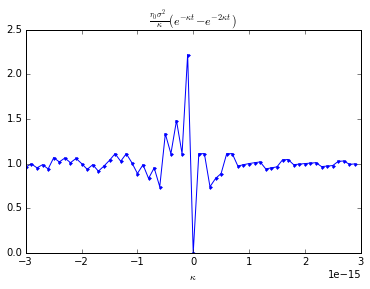

In [6]:
k = np.arange(-3e-8, 3e-8, 1e-9)*1e-7
#t, r, sig2 = np.float32(1.), np.float32(1.), np.float32(1.)
t, r, sig2 = 1, 1, 1

v = (exp(-k*t)-exp(-2.*k*t))*r*sig2/k
plot(k, v, '.-')
title(r'$\frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$')
xlabel(r'$\kappa$')
#figsize=(16,4)

### Part 2

We can implement a simple taylor expansion and get an alternative function:  
$$f(\kappa) = r_0\sigma^2 e^{-\kappa t} t$$  
Which is obviously stable around $\kappa = 0$ as the following plot shows:

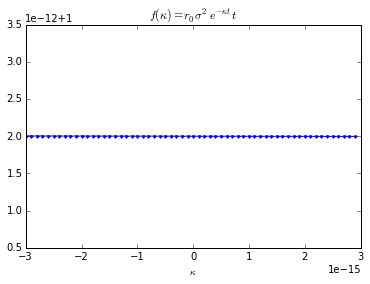

In [7]:
k = np.arange(-3e-8, 3e-8, 1e-9)*1e-7
t, r, sig2 = 1, 1, 1
v = r*sig2*exp(-k*t)*t
plot(k, v, '.-')
title(r'$f(\kappa) = r_0\sigma^2 e^{-\kappa t} t$')
xlabel(r'$\kappa$');

For the threshold, the omitted part of the above taylor expansion is $O(k^{2})$, so theoretically, the threshold for single and double precision should be the same, i.e. no less than $\sqrt{\epsilon_{mach}} = 10^{-8}$

However my implementation shows something diffrent:  
Threshold for double precision is stable around $h = 10^{-15}$  
While for single precision, the threshold is stable around $h = 10^{-6}$

#### Double Precision

In [8]:
# Choose threshold for double precision 

K = np.arange(-3e-8, 3e-8, 4e-10)*1e-7
t, r, sig2 = 1., 1., 1.
threshold1, threshold2, threshold3 = 1e-17, 1e-16, 1e-15

v0, v1, v2, v3 = [], [], [], []
for k in K:
    v0.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    if k < -threshold1 or k > threshold1:
        v1.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    else:
        v1.append(r*sig2*exp(-k*t)*t)
for k in K:
    if k < -threshold2 or k > threshold2:
        v2.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    else:
        v2.append(r*sig2*exp(-k*t)*t)
for k in K:
    if k < -threshold3 or k > threshold3:
        v3.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    else:
        v3.append(r*sig2*exp(-k*t)*t)

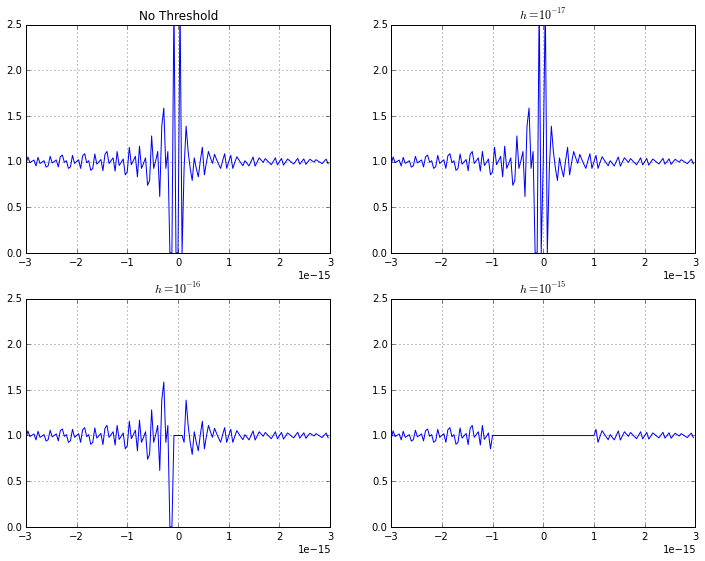

In [9]:
plt.figure(1, figsize=(12,9))

# No Threshold
plt.subplot(221)
plt.plot(K, v0)
plt.title('No Threshold')
plt.grid(True)
plt.ylim([0, 2.5])

# Threshold1
plt.subplot(222)
plt.plot(K, v1)
plt.title(r'$h = 10^{-17}$')
plt.grid(True)
plt.ylim([0, 2.5])

# Threshold2
plt.subplot(223)
plt.plot(K, v2)
plt.title(r'$h = 10^{-16}$')
plt.grid(True)
plt.ylim([0, 2.5])

# Threshold3
plt.subplot(224)
plt.plot(K, v3)
plt.title(r'$h = 10^{-15}$')
plt.grid(True)
plt.ylim([0, 2.5])

plt.show()

#### Single Precision

In [10]:
# Choose threshold for single precision 

K = np.arange(-3e-5, 3e-5, 4e-7,dtype=float32)*(1e-1)
t, r, sig2 = np.float32(1), np.float32(1), np.float32(1)
threshold1, threshold2, threshold3 = np.float32(1e-8), np.float32(1e-7), np.float32(1e-6)

v0, v1, v2, v3 = [], [], [], []
for k in K:
    v0.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    if k < -threshold1 or k > threshold1:
        v1.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    else:
        v1.append(r*sig2*exp(-k*t)*t)
for k in K:
    if k < -threshold2 or k > threshold2:
        v2.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    else:
        v2.append(r*sig2*exp(-k*t)*t)
for k in K:
    if k < -threshold3 or k > threshold3:
        v3.append((exp(-k*t)-exp(-2.*k*t))*r*sig2/k)
    else:
        v3.append(r*sig2*exp(-k*t)*t)

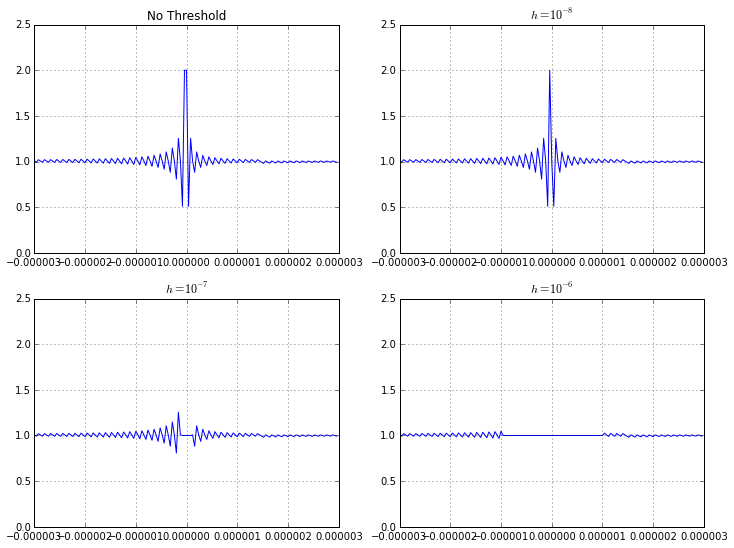

In [11]:
plt.figure(1, figsize=(12,9))

# No Threshold
plt.subplot(221)
plt.plot(K, v0)
plt.title('No Threshold')
plt.grid(True)
plt.ylim([0, 2.5])

# Threshold1
plt.subplot(222)
plt.plot(K, v1)
plt.title(r'$h = 10^{-8}$')
plt.grid(True)
plt.ylim([0, 2.5])

# Threshold2
plt.subplot(223)
plt.plot(K, v2)
plt.title(r'$h = 10^{-7}$')
plt.grid(True)
plt.ylim([0, 2.5])

# Threshold3
plt.subplot(224)
plt.plot(K, v3)
plt.title(r'$h = 10^{-6}$')
plt.grid(True)
plt.ylim([0, 2.5])

plt.show()

## Problem 3:

Implement a matrix product function using hand coded loops in python, please feel free to use numpy array and numpy vector multiplications, but obviously you should not just call numpy matrix multiplication.

Compare the speed of your implementation to the numpy matrix product version, plot the difference in computational time with the size of the matrix.


Hint: 

* %timeit is a useful timing tool in IPython, or you can use time.clock() function
* numpy has two ways of representing matrix, one is array of arrays, another is matrix type. For array types, the matrix production is ```a.dot(b)```, for matrix type, the matrix production is ```a*b```. We recommend you to stick with array type to avoid any potential confusions. The ```a*b``` on array type is element wise multiplication. A common mistake is use ```a*b``` for matrix production on array type. Please see the following code section as an example.
* numpy.allclose is a useful funciton to compare floating point calculation results


## Solution:

In [12]:
def matixMult(a, b):
    m = len(a)
    n = len(b[0])
    c = np.empty((m, n))
    for i in xrange(m):
        for j in xrange(n):
            c[i][j] = sum(a[i] * b[:, j])
    return c

In [13]:
import time

dim = np.arange(3, 500, 10)
time1 = []
time2 = []

for i in dim:
    a = np.arange(1, i**2+1).reshape(i, i)
    b = a + 1
    start = time.time()
    matixMult(a, b)
    end = time.time()
    time1.append(end - start)
    start = time.time()
    a.dot(b)
    end = time.time()
    time2.append(end - start)

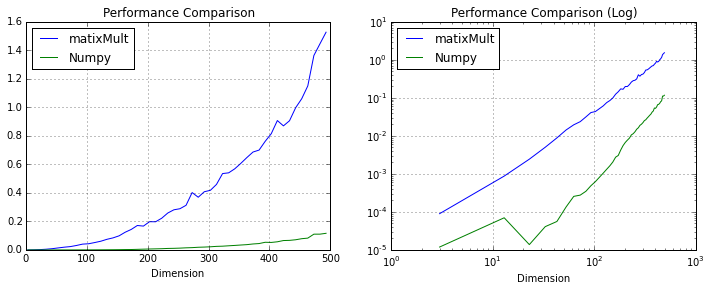

In [14]:
plt.figure(1, figsize=(12,9))
plt.subplot(221)
plt.plot(dim, time1, label="matixMult")
plt.plot(dim, time2, label="Numpy")
plt.title('Performance Comparison')
plt.xlabel("Dimension")
plt.grid(True)
plt.legend(loc = 'best')

plt.subplot(222)
plt.plot(dim, time1, label="matixMult")
plt.plot(dim, time2, label="Numpy")
plt.title('Performance Comparison (Log)')
plt.xlabel("Dimension")
plt.grid(True)
plt.legend(loc = 'best')
plt.yscale("log")
plt.xscale("log")
plt.show()

## Book problems

### 2.8

Hint: 

* The extra credit part of this problem is rather involved, you are encouraged to try but there is no need to spend too much time.
* In python, floating point numbers are double precision by default, but you can force them to be single precision by calling numpy.float32, please see the following example:

In [15]:
a = np.float32(1.)
b = np.float64(1.)

print type(a), type(b)

<type 'numpy.float32'> <type 'numpy.float64'>


## Solution
### Part (a)

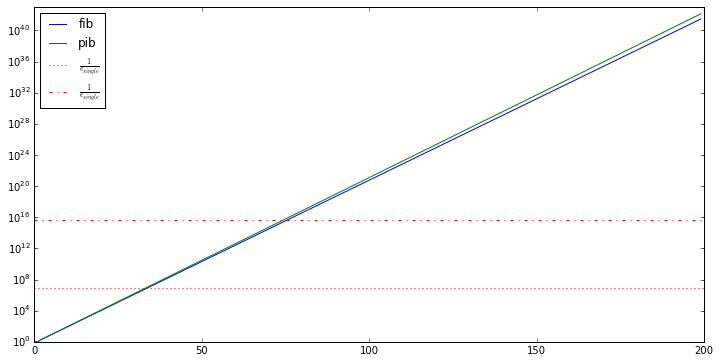

In [16]:
n = 200
f = np.zeros(n)
f[0], f[1] = 1, 1
p = np.zeros(n)
p[0], p[1] = 1, 1
c = np.sqrt(3)/100. + 1.

for i in xrange(2, n):
    f[i] = f[i-1] + f[i-2]
    p[i] = c*p[i-1] + p[i-2]

plt.figure(1, figsize=(12,6))
plt.plot(range(n), f, label="fib")
plt.plot(range(n), p, label="pib")
plt.yscale("log")
plt.axhline(1./np.finfo(float32).eps, label = r"$\frac{1}{\epsilon_{single}}$", color='r', linestyle=':')
plt.axhline(1./np.finfo(float).eps, label = r"$\frac{1}{\epsilon_{single}}$", color='r', linestyle='-.')
plt.legend(loc='best')
plt.show()

### Part(b)

The double precision performs more stable than the single precision in fib series
* The error of fib series for single precision starts from $n=37$
* The error of fib series for double precision starts from $n=79$

In [17]:
def get_fib(n, dtype):
    a, b = map(dtype, [1, 1])
    for i in xrange(n-1):
        a, b = b, a + b
    return a

def diff_fib(n, dtype):
    a, b = get_fib(n, dtype), get_fib(n-1, dtype)
    for i in xrange(n-1):
        a, b = b, a - b
    return abs(a-1)

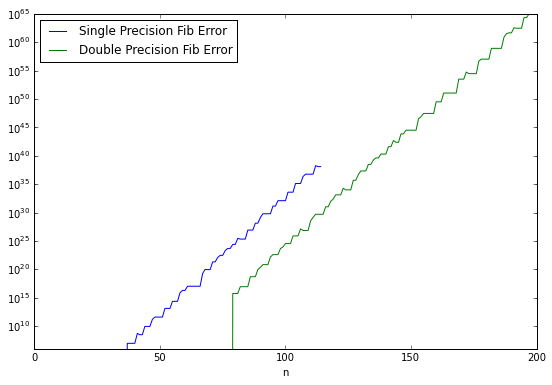

In [18]:
n = 200
fib_error_32 = []
fib_error_64 = []
for i in xrange(3, n):
    fib_error_32.append(diff_fib(i, np.float32))
    fib_error_64.append(diff_fib(i, np.float64))

plt.figure(1, figsize=(9,6))
plt.plot(range(3, n), fib_error_32, label="Single Precision Fib Error")
plt.plot(range(3, n), fib_error_64, label="Double Precision Fib Error")
plt.legend(loc='best')
plt.yscale("log")
plt.xlabel("n")
plt.show()

### Part(c)

The error of pib series is more typical than the previous fib series, it occours immediately.
* For single precision, it starts from $n=3$
* For double precision, it starts from $n=7$

In [19]:
def get_pib(n, dtype):
    a, b, c = map(dtype, [1., 1., np.sqrt(3)/100. + 1.])
    for i in xrange(n-1):
        tmp = b
        b = c * b + a
        a = tmp
    return a

def diff_pib(n, dtype):
    a, b = get_pib(n, dtype), get_pib(n-1, dtype)
    c = dtype(np.sqrt(3)/100. + 1.)
    for i in xrange(n-1):
        tmp = b
        b = a - c * b
        a = tmp
    return abs(a-1)

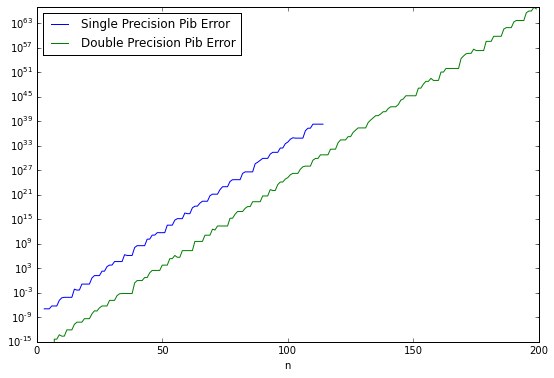

In [20]:
n = 200
pib_error_32 = []
pib_error_64 = []
for i in xrange(3, n):
    pib_error_32.append(diff_pib(i, np.float32))
    pib_error_64.append(diff_pib(i, np.float64))

plt.figure(1, figsize=(9,6))
plt.plot(range(3, n), pib_error_32, label="Single Precision Pib Error")
plt.plot(range(3, n), pib_error_64, label="Double Precision Pib Error")
plt.legend(loc='best')
plt.yscale("log")
plt.xlabel("n")
plt.show()

## Extra Credit

Find and explain the cause of large errors in lecture slide "Unexpected Twist", and implement a new version that is more accurate.

## Solution:

The problem is `(1.*x**i)`, if we simply assign `x` to an integer, and we want to sum to a large range, say `i in range(100)`, `x**i` will overflow first.  
So we just need to convert x to float first, i.e. `x = np.float64(x)`, then complete remaining calculations.

In [21]:
import math

def exp_taylor(x, n) :
    x = np.float64(x) # Convert x to float
    return sum([(1.*x**i)/math.factorial(i) for i in np.arange(1, n)]) + 1.

terms = 100
x = 5
print "rel err for exp(%.f) is %.10f%%" % (x, (np.exp(x) - exp_taylor(x, terms))/np.exp(x)*100)
x = -7
print "rel err for exp(%.f) is %.10f%%" % (x, (np.exp(x) - exp_taylor(x, terms))/np.exp(x)*100)

print "exp_taylor(%.f) = %.12f, exp(%.f) = %.12f" % (x, exp_taylor(x, terms), x, np.exp(x))

rel err for exp(5) is -0.0000000000%
rel err for exp(-7) is -0.0000000026%
exp_taylor(-7) = 0.000911881966, exp(-7) = 0.000911881966
